# Regression Model Evaluation
### March 2016

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectKBest, f_regression

### define functions

In [2]:
def helpFloat(x): 
    try:
        return float ( float(x['thumbsup']) / (float(x['thumbsup']) + float(x['thumbsdown'])) )
    except:
        return 0
    
def thumbsSum(x): 
    try:
        return int(x['thumbsup']) + int(x['thumbsdown']) 
    except:
        return 0
    
def simple_spearman(x,y): return np.abs(spearmanr(x,y)[0])
spearmanr_scorer = make_scorer(simple_spearman)

### load buscape reviews

In [36]:
#reviews_features = pd.read_csv('reviews.csv.gz', compression='gzip')
reviews_features = pd.read_csv('amazon-help.csv.gz', compression='gzip')
reviews_features['helpfulness'] = reviews_features.apply(helpFloat,axis=1)
reviews_features['thumbstotal'] = reviews_features.apply(thumbsSum,axis=1)
reviews_features.shape

(35001, 46)

### filter dataset

In [37]:
reviews_features = reviews_features[reviews_features.thumbstotal>4]
reviews_features = reviews_features.sample(frac=0.6)
reviews_features = reviews_features[np.isfinite(reviews_features.helpfulness)]
reviews_features.shape

(9072, 46)

### split data and class

In [38]:
# split class and features
labels = reviews_features["helpfulness"].values
reviews_columns = reviews_features.select_dtypes(include=['float64','int']).columns.drop('helpfulness')
features = reviews_features[list(reviews_columns)].values

# clean features
features = np.abs(features)
features[np.isnan(features) == True] = 0

features.shape

(9072, 45)

## 1. Run 10-fold cross validation over N kbest features

In [39]:
def cv4kBest(model, feats, labs, cvOpt, loops):
    result_list = []
    for i in range(1, loops+1):
        n_features_linear.append(i)

        kbest_features = SelectKBest(f_regression, k=i).fit_transform(feats, labs)
        scores = cross_val_score(model, kbest_features, labels, cv=cvOpt, scoring=spearmanr_scorer)
        result_list.append(scores.mean())

        print str(i) + ',' + str(scores.mean())
        
    return result_list

###  1.1. for  linear regression

In [40]:
linear_model = LinearRegression()

spearmanr_scores_linear = cv4kBest(linear_model, features, labels, 5, 15)

1,0.270422405441
2,0.318978618223
3,0.319426479168
4,0.321367457028
5,0.321359025409
6,0.33628077983
7,0.341011944717
8,0.341643072906
9,0.347024431939
10,0.347163068582
11,0.349123427743
12,0.351060059752
13,0.350944195107
14,0.350110132927
15,0.348991667788


###  1.1. for svm linear regression

In [41]:
linearSVR_model = LinearSVR(epsilon=0.01)

spearmanr_scores_svrLinear = cv4kBest(linearSVR_model, features, labels, 5, 15)

1,0.270422405441
2,0.314954679986
3,0.238214288655
4,0.238389267399
5,0.178098629565
6,0.186986540729
7,0.195447371032
8,0.235428937224
9,0.253214485969
10,0.227389772852
11,0.273826735803
12,0.279993069586
13,0.267512918577
14,0.307151205411
15,0.261760383121


###  1.2. for rbf regression

In [42]:
svr_model = SVR(C=1.0, epsilon=0.01, kernel='rbf')

spearmanr_scores_svr = cv4kBest(svr_model, features, labels, 5, 15)

1,0.268466483641
2,0.321828726247
3,0.199598559734
4,0.112706543043
5,0.102216336389
6,0.0312896858128
7,0.0323703215359
8,0.0358939924466
9,0.0559682368267
10,0.0377132166662
11,0.0359527431018
12,0.0560093917859
13,0.056855687169
14,0.0469960836026
15,0.0413370763421


### 1.3 Plot Chart

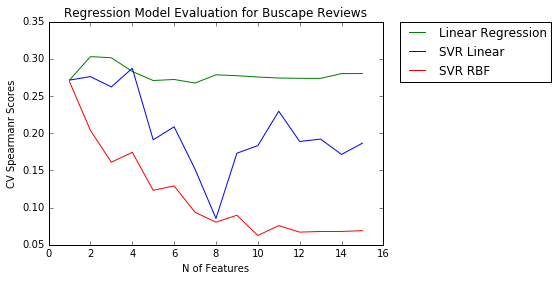

In [31]:
plt.figure()

n_features = range(1, 16)

plt.plot(n_features, spearmanr_scores_linear, 'g', label='Linear Regression')
plt.plot(n_features, spearmanr_scores_svrLinear, 'b', label='SVR Linear')
plt.plot(n_features, spearmanr_scores_svr, 'r', label='SVR RBF')
plt.xlabel('N of Features')
plt.ylabel('CV Spearmanr Scores')
plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Regression Model Evaluation for Buscape Reviews')
plt.show()

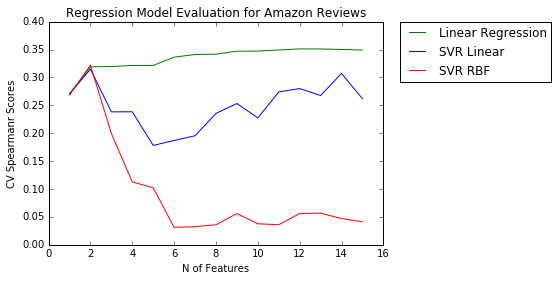

In [43]:
plt.figure()

n_features = range(1, 16)

plt.plot(n_features, spearmanr_scores_linear, 'g', label='Linear Regression')
plt.plot(n_features, spearmanr_scores_svrLinear, 'b', label='SVR Linear')
plt.plot(n_features, spearmanr_scores_svr, 'r', label='SVR RBF')
plt.xlabel('N of Features')
plt.ylabel('CV Spearmanr Scores')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title('Regression Model Evaluation for Amazon Reviews')
plt.show()